# Today Python Task 16-05-2025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data1 = pd.read_csv(r"C:\Users\ACER\Desktop\Udaanous\Python\Python PDF\practice_data.csv")
Data = pd.DataFrame(Data1)
Data.head(5)

,EmployeeID,gender,department,Days Present,Accuracy_of_Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
encoder = LabelEncoder()
Data1["gender_encode"] = encoder.fit_transform(Data1["gender"])

In [5]:
Data1["gender_encode"].head()

0    1
1    0
2    1
3    1
4    0
Name: gender_encode, dtype: int32

In [6]:
X = Data1.drop(["Days Present"],axis=1)
Y = Data1["churned"]
X.head()
Y.head()

0     No
1    Yes
2     No
3     No
4    Yes
Name: churned, dtype: object

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
Scaler = StandardScaler()
Data1["Task Completion Rates"] = Scaler.fit_transform(Data1[["Task Completion Rates"]])
Data1["Task Completion Rates"].head()

0    0.854965
1    1.407129
2    0.302800
3   -0.249365
4    0.854965
Name: Task Completion Rates, dtype: float64

In [9]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
Data1["Sales Revenue Generated"] = Scaler.fit_transform(Data1[["Sales Revenue Generated"]])
Data1["Sales Revenue Generated"].head()

0    0.000000
1    1.000000
2    0.946793
3    0.870209
4    0.273164
Name: Sales Revenue Generated, dtype: float64

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

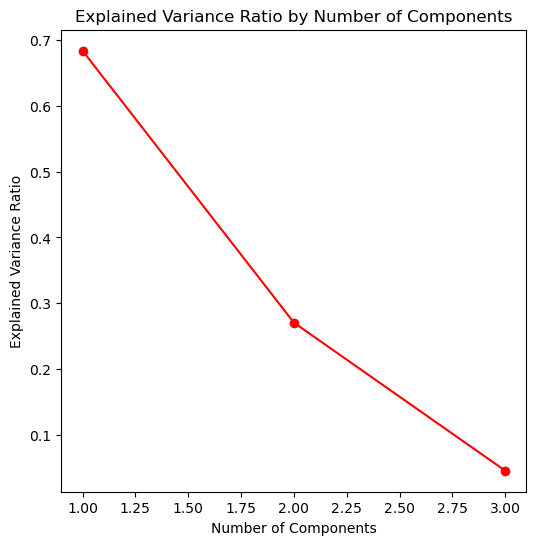

PCA result shape: (31, 3)
First few rows of PCA-transformed data:
[[-1.21956987 -1.43083181  0.10540596]
 [ 0.61568408 -0.84801605 -1.15834026]
 [ 3.88477106 -1.51495016  0.59887697]
 [-2.41191217  0.74580022 -0.1398204 ]
 [ 1.6305556  -0.43497032 -0.8353622 ]]


In [11]:
# pca = PCA()
# VL= pca.fit_transform(Data1[["Sales Revenue Generated","Decision-Making Skills Rating"]])
# evr = pca.explained_variance_ratio_

# plt.figure(figsize=(10,6))
# plt.plot(range(1,len(evr)+ 1),evr, marker="o")
# plt.title("Sales Revenue Generated_PCA")
# plt.xlabel("number of Components")
# plt.ylabel("Explained Variance Ratio")
# plt.show()





pca = PCA()
temp_pca = pca.fit_transform(Data1[["Task Completion Rates",'Days Present','Interpersonal Skills Rating']])

evr = pca.explained_variance_ratio_
plt.figure(figsize=(6,6))
plt.plot(range(1, len(evr) + 1), evr, marker='o',color="red")
plt.title('Explained Variance Ratio by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()


num_components = 3


pca = PCA(n_components=num_components)
x_pca = pca.fit_transform(Data1[["Task Completion Rates",'Days Present','Interpersonal Skills Rating']])

print(f"PCA result shape: {x_pca.shape}")
print("First few rows of PCA-transformed data:")
print(x_pca[:5])



In [12]:
from sklearn.model_selection import train_test_split
import random
import numpy as np

In [13]:
scaled = np.random.rand(100, 1)    
y = np.random.randint(20, 51, 100)
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)
#x_train, x_test, y_train, y_test

(80, 1) (20, 1)
(80,) (20,)


# Python Task 19-05-2025

# Linear Regression & Machine Learning 

In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

In [15]:
x_train = Data[["Task Completion Rates"]]
y_test = Data[["Interpersonal Skills Rating"]]
x_test  = Data[["Task Completion Rates"]]
y_train = Data[["Interpersonal Skills Rating"]]

In [16]:
model = LinearRegression()  # ✅ Note the parentheses!
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mape = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mape)

Mean squared error: 0.8236859341738989


In [17]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mape = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mape)

Mean squared error: 0.753763440860215


In [18]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mape = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mape)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean squared error: 0.7550959106087753


# Python Task 20-05-2025

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
Data.head()

,EmployeeID,gender,department,Days Present,Accuracy_of_Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes


# Logistic Regression

In [65]:
A = ["Decision-Making Skills Rating"]
B = ["Interpersonal Skills Rating"]

X = Data[A]
y = Data[B].values.ravel()  # flatten y

# Split the data into train and test sets (e.g., 80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model with more iterations to avoid convergence warning
model = LogisticRegression(max_iter=1000)

# Fit the model
model.fit(x_train, y_train)

# Predict on test set
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7142857142857143


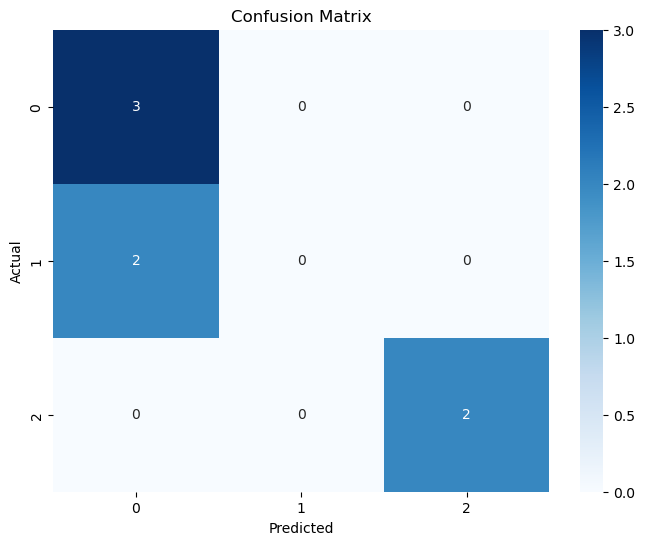

In [66]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Decision Tree Classifier

Accuracy: 0.14285714285714285


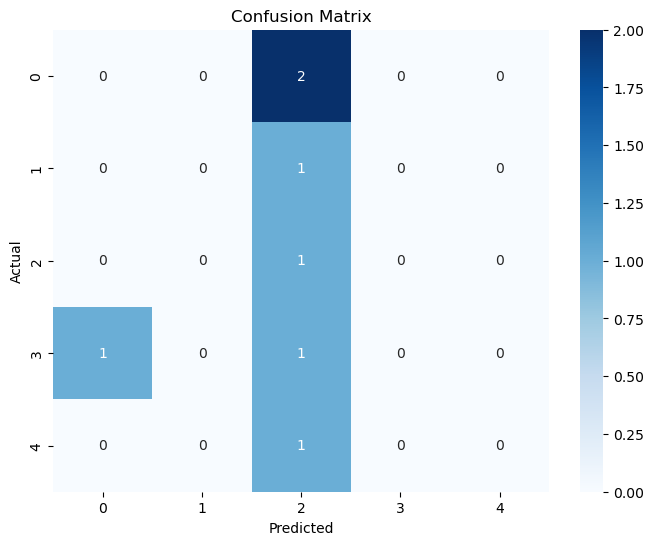

In [72]:
A = ["Decision-Making Skills Rating"]
B = ["Task Completion Rates"]

X = Data[A]
y = Data[B].values.ravel()  # flatten y

# Split the data into train and test sets (e.g., 80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model with more iterations to avoid convergence warning
model = DecisionTreeClassifier()

# Fit the model
model.fit(x_train, y_train)

# Predict on test set
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest Classifier

Accuracy: 0.0


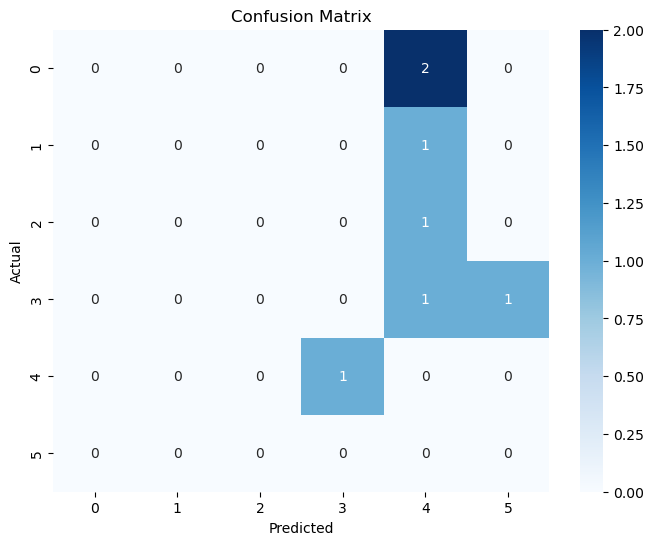

In [71]:
A = ["Decision-Making Skills Rating"]
B = ["Task Completion Rates"]

X = Data[A]
y = Data[B].values.ravel()  # flatten y

# Split the data into train and test sets (e.g., 80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model with more iterations to avoid convergence warning
model = RandomForestClassifier()

# Fit the model
model.fit(x_train, y_train)

# Predict on test set
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()